## K-Means Clustering

### Implementation

1. Initialize: choose k random points as initial centroids
2. Assignment: for each data point, calculate the distance between that point to each one of the <br>
k centroids. Assign the data point to the cluster whose centroid is closest to it.
3. Update Centroids: Once all data points have been assigned to clusters, recalculate the centroids <br>
of the clusters by taking the mean of all data points assigned to that cluster.
4. Repeat steps 2 and 3 until centroids converge (no significant change when max_iters reached)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
from sklearn.datasets import make_blobs

In [13]:
# np.newaxis is used to increase the dimension of an existing array by one

# convert 1D array into a 2D row vector
arr_1d = np.array([1,2,3,4])
row_vec = arr_1d[np.newaxis, :]
print(row_vec) 

# convert a 1D array into a 2D column vector
col_vec = arr_1d[:, np.newaxis]
print(col_vec)

[[1 2 3 4]]
[[1]
 [2]
 [3]
 [4]]


In [20]:
# np.linalg.norm calculates the magnitude(length) of a vector or the normal vector of a matrix(hyper-plane)
# l1 norm is Manhattan distance
l1_norm = np.linalg.norm(arr_1d, ord=1)

# l2 norm is Euclidian distance
l2_norm = np.linalg.norm(arr_1d, ord=2)

l1_norm, l2_norm

(10.0, 5.477225575051661)

In [5]:
class KMeans:
    def __init__(self, k=3, max_iters=60, tol=1e-4):
        # Number of clusters
        self.k = k
        # Maximum number of iterations for convergence
        self.max_iters = max_iters
        # Tolerance to declare convergence (if centroids move less than this)
        self.tol = tol
    

    def fit(self, X):
        n_samples, n_features = X.shape

        # Randomly initialize k centroids from the data points
        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            self.labels = self._assign_clusters(X)
            # Store the old centroids for convergence check
            old_centroids = self.centroids.copy()
            # Update centroids based on current cluster assignments
            self.centroids = self._update_centroids(X)

            # Check for convergence: if centroids move less than tol, stop
            if (np.all(np.linalg.norm(self.centroids - old_centroids, axis=1)) < self.tol): 
                break


    def _assign_clusters(self, X):
        # Compute distances from each point to each centroid
        # np.linalg.norm computes the Euclidean distance (L2 norm) between points.
        # axis=2 means we compute the norm (distance) along the feature axis for each point-centroid pair.
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        # Assign each point to the closest centroid
        # np.argmin gets the minimum value along an axis
        return np.argmin(distances, axis=1)
    

    def _update_centroids(self, X):
        # Create an array to hold the new centroids
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            # Select all points assigned to cluster i
            points_in_cluster = X[self.labels == i]
            # If cluster is not empty, update centroid as mean of points
            if (len(points_in_cluster) > 0):
                new_centroids[i] = points_in_cluster.mean(axis=0)

        return new_centroids


    def predict(self, X):
        # Assign clusters to new data points
        return self._assign_clusters(X)
    

    def plot_clusters(self, X):
        for i in range(self.k):
            points = X[self.labels == i]
            plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
        plt.legend()
        plt.show()



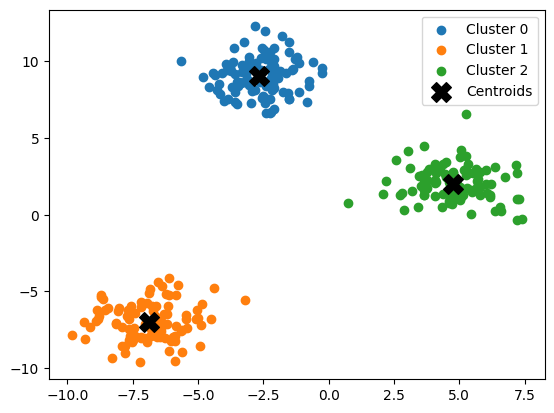

In [6]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.2, random_state=42)

kmeans = KMeans(k=3)
kmeans.fit(X)
kmeans.plot_clusters(X)

### Test Clustering Example on Loan Data

In [2]:
data = pd.read_csv('clustering_data.csv')
data.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
data = data.drop(labels=["Loan_ID"], axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
# convert categorical data to numerical data
le = LabelEncoder()
data["Education"] = le.fit_transform(data["Education"])
data["Gender"] = le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])

In [7]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3+,0,0,5703,0.0,128.0,360.0,1.0,2,1
377,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1


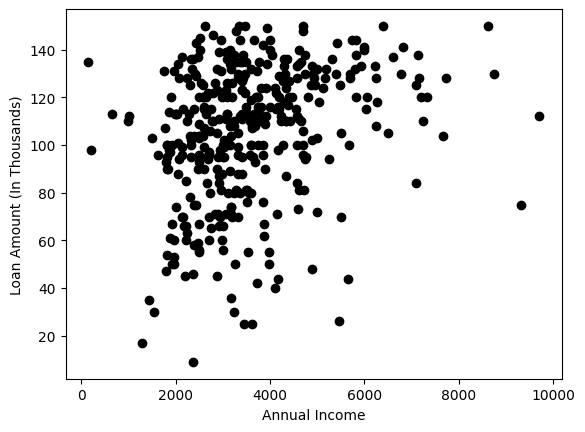

In [8]:
X = data[["LoanAmount","ApplicantIncome"]]
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [9]:
# manually implementing K Means algorithm from scratch without libraries 

K = 3
centroids = X.sample(n=K) # picking random samples from the data

diff = 1
j = 0

while (diff != 0):
    Xd = X.copy() # copy of our features
    i = 1
    # for each point in centroids
    for index1, row_c in centroids.iterrows():
        ED = [] # euclidian distances 
        # for each point in the data => calcualte the euclidian distance 
        for index2, row_d in Xd.iterrows():
            d1 = (row_c["ApplicantIncome"] - row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"] - row_d["LoanAmount"])**2
            d  = np.sqrt(d1 + d2)
            ED.append(d)
            
        X.loc[:, i] = ED     # use .loc for assignment
        i += 1
    
    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if (row[i+1] < min_dist):
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    
    X.loc[:, "Cluster"] = C
    centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
    if j == 0:
        diff = 1
        j += 1
    else:
        diff = (centroids_new["LoanAmount"] - centroids["LoanAmount"]).sum() + (centroids_new["ApplicantIncome"] - centroids["ApplicantIncome"]).sum()
        print(diff.sum())

    centroids = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]



C:\Users\108pa\AppData\Local\Temp\ipykernel_3352\1413176854.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, i] = ED     # use .loc for assignment
C:\Users\108pa\AppData\Local\Temp\ipykernel_3352\1413176854.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, i] = ED     # use .loc for assignment
C:\Users\108pa\AppData\Local\Temp\ipykernel_3352\1413176854.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

-391.44716787596724
-341.25657624262703
-372.64485829714044
-371.69767604413073
-319.991388535707
-330.54482458691956
-133.3283885143341
-163.2283919837503
-144.67450430112757
-93.32770782368112
-65.06691416725587
-55.03495831127759
-9.190752402517077
-9.19844100901777
-9.237706177129652
0.0


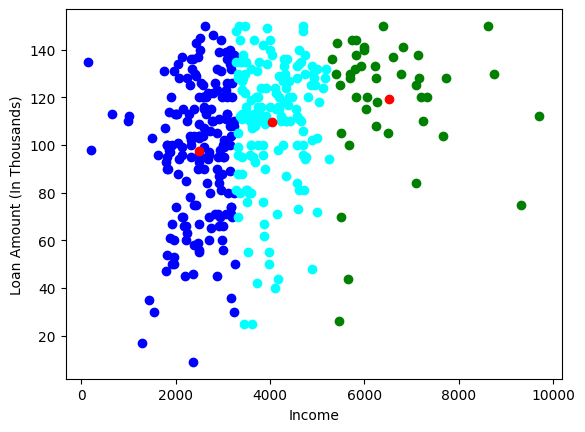

In [10]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"] == k+1]
    plt.scatter(data["ApplicantIncome"], data["LoanAmount"], c=color[k])
plt.scatter(centroids["ApplicantIncome"], centroids["LoanAmount"], c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

#### Elbow rule to chose clusters: when inertia drops drastically, that number of clusters are usually optimal

#### Silhuette score: mean silhouette coefficient over all the instances<br>
#### an instance's silhouette coef = (b - a) / max(a,b)
a is the mean distance to the other isntances in the same cluster ( mean intra cluster distance )<br>
b is the mean distance to nearest instance of closest cluster<br>

silhouette coef close to +1 means that the instance is well inside it's own cluster<br>
silhouette coef close to -1 means that the instance is way outside the cluster


### K-Means++

Choosing the cluster locations ourselves to get more accurate clustering

### K-Means for image segmentation

basically color segmentation of a large image with only one object with a predominantly even color.